# Task 4: Exploratory Data Analayis-Terrorism


## Author- Mayuri Jaigude



Dataset:https://bit.ly/2TK5Xn5

### GRIP @The Sparks Foundation
### GRIP October 2021 Internship

# 

Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading Dataset

In [2]:
df=pd.read_csv("Dataset.csv")
df.head(5)

C:\Users\mayur\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
df.shape

(181691, 135)

Data Pre-Processing (Cleaning)

In [5]:
df=df[["iyear","imonth","iday","country_txt","region_txt","city","latitude","longitude","attacktype1_txt","targtype1_txt","nkill","nwound"]]

In [6]:
df.rename(columns={"iyear":"Year","iday":"day","imonth":"Month","region_txt":"region","country_txt":"country","attacktype1_txt":"attacktype","targtype1_txt":"targettype","nkill":"killed","nwound":"wounded"})



,Year,Month,day,country,region,city,latitude,longitude,attacktype,targettype,killed,wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,Military,1.0,2.0
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,Military,2.0,7.0
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,Private Citizens & Property,0.0,0.0
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,Government (General),0.0,0.0


In [7]:
df.isna().sum()

iyear                  0
imonth                 0
iday                   0
country_txt            0
region_txt             0
city                 434
latitude            4556
longitude           4557
attacktype1_txt        0
targtype1_txt          0
nkill              10313
nwound             16311
dtype: int64

In [8]:
df["nkill"]=df["nkill"].fillna(0)
df["nwound"]=df["nwound"].fillna(0)
df["casualty"]=df["nkill"]+df["nwound"]

In [9]:
print("No of countries : ",df.country_txt.nunique())
print("No of region : ",df.region_txt.nunique())
print("Dataset consist of terrorist attacks from ",df.iyear.min() ,"to ",df.iyear.max())
print("No of kills : ",df.nkill.sum())
print("No of wounded : ",df.nwound.sum())
print("No of casualty : ",df.casualty.sum())

No of countries :  205
No of region :  12
Dataset consist of terrorist attacks from  1970 to  2017
No of kills :  411868.0
No of wounded :  523869.0
No of casualty :  935737.0


In [10]:
df.describe()

,iyear,imonth,iday,latitude,longitude,nkill,nwound,casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


No of Attacks in each year

In [11]:
attack=df["iyear"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"year","iyear":"Attacks"}).set_index("year")
attack.head(5)

,Attacks
year,
1970,651
1971,471
1972,568
1973,473
1974,581


Text(0, 0.5, 'No of Attacks')

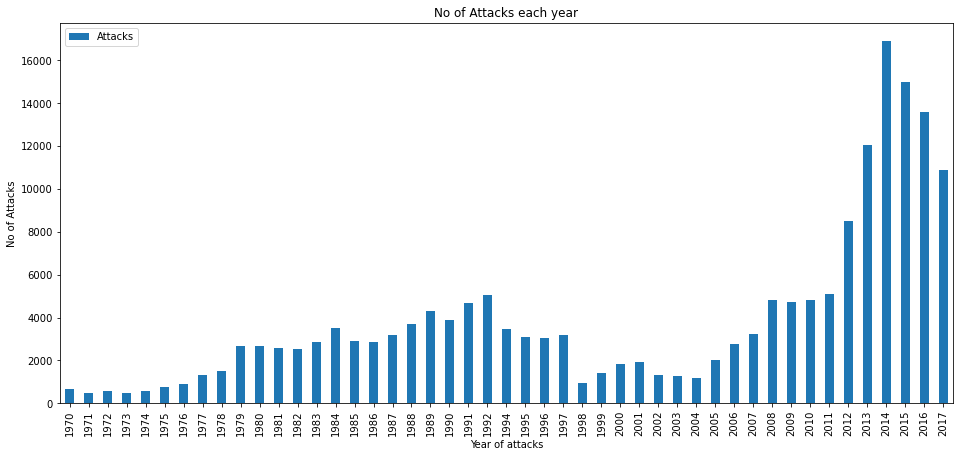

In [12]:
attack.plot(kind="bar",figsize=(16,7))
plt.title("No of Attacks each year")
plt.xlabel("Year of attacks")
plt.ylabel("No of Attacks")

Casualties in each year

In [13]:
cas=df[["iyear","casualty"]].rename(columns={"iyear":"Year"}).groupby("Year").sum()
cas.head()

,casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


Text(0, 0.5, 'No of Casualty')

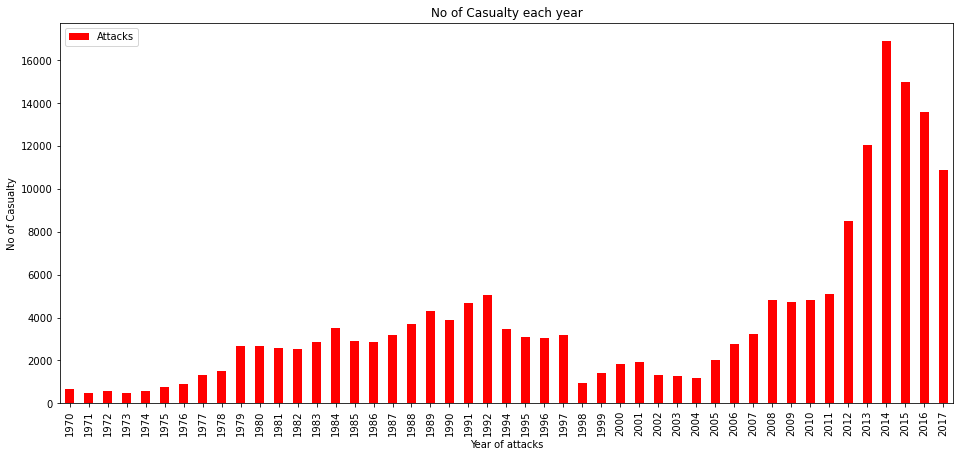

In [14]:
attack.plot(kind="bar",figsize=(16,7),color="red")
plt.title("No of Casualty each year")
plt.xlabel("Year of attacks")
plt.ylabel("No of Casualty")

Kills in each Year

In [15]:
kill=df[["iyear","nkill"]].rename(columns={"iyear":"Year","nkill":"killed"}).groupby("Year").sum()
kill.head()

,killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


Text(0, 0.5, 'No of kills')

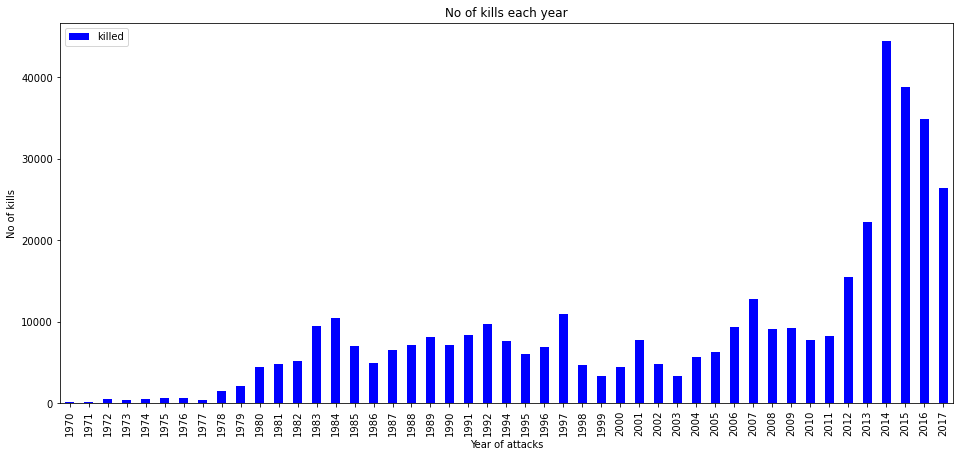

In [16]:
kill.plot(kind="bar",figsize=(16,7),color="blue")
plt.title("No of kills each year")
plt.xlabel("Year of attacks")
plt.ylabel("No of kills")

Wounded in each Year

In [17]:
w=df[["iyear","nwound"]].rename(columns={"iyear":"Year","nwound":"Wounded"}).groupby("Year").sum()
w.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


Text(0, 0.5, 'No of Wounded')

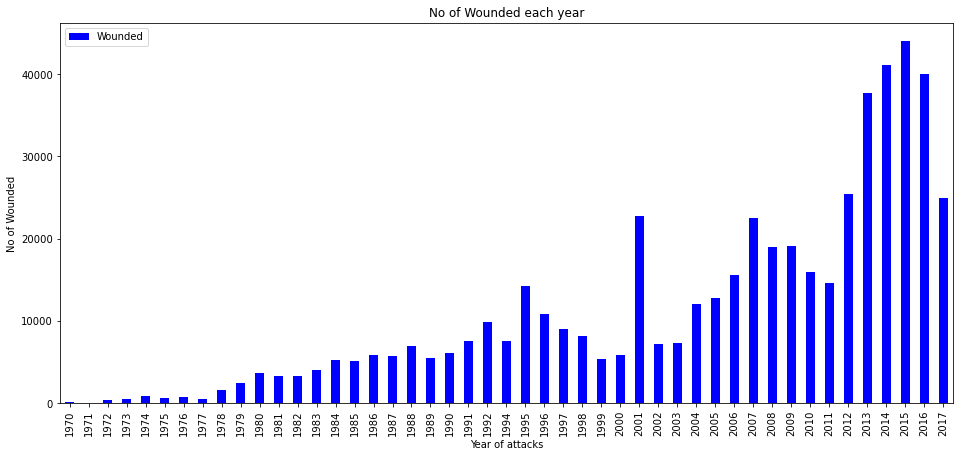

In [18]:
w.plot(kind="bar",figsize=(16,7),color="blue")
plt.title("No of Wounded each year")
plt.xlabel("Year of attacks")
plt.ylabel("No of Wounded")

Region wise Attacks

In [19]:
re=pd.crosstab(df.iyear,df.region_txt)
re.head(3)

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
iyear,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376


Text(0, 0.5, 'No of Attacks')

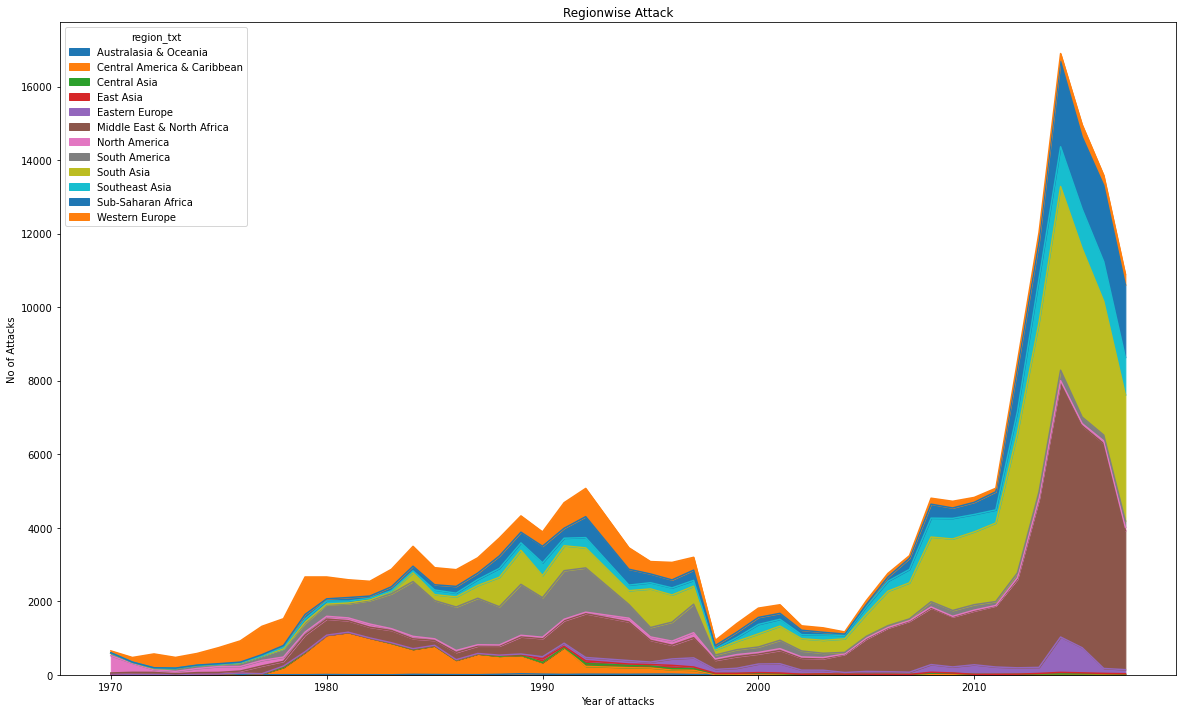

In [20]:
re.plot(kind="area",figsize=(20,12))
plt.title("Regionwise Attack")
plt.xlabel("Year of attacks")
plt.ylabel("No of Attacks")

Countrywise Attack for Top 12 Countries

In [21]:
con=df["country_txt"].value_counts().head(12)
con

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Name: country_txt, dtype: int64

Text(0, 0.5, 'Country')

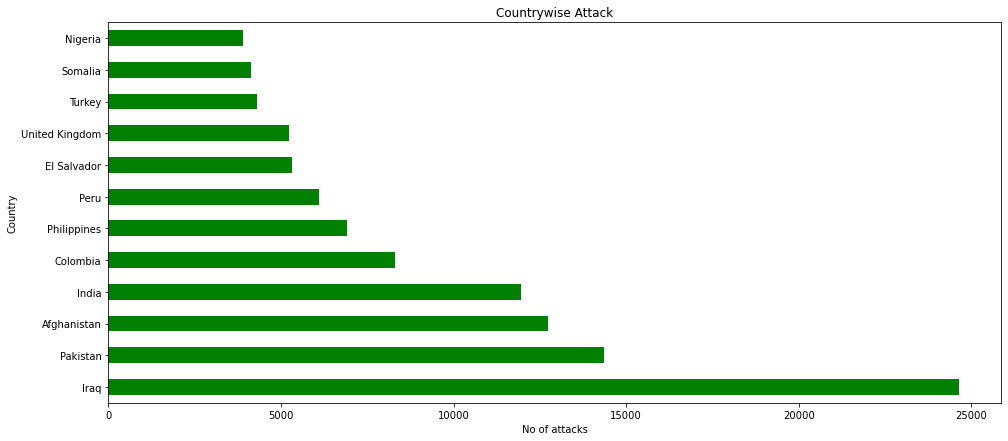

In [22]:
con.plot(kind="barh",figsize=(16,7),color="green")
plt.title("Countrywise Attack")
plt.xlabel("No of attacks")
plt.ylabel("Country")


Citywise Top 12 Cities

In [23]:
city=df["city"].value_counts()[1:13]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Bogota           984
Kirkuk           925
Name: city, dtype: int64

Text(0, 0.5, 'City')

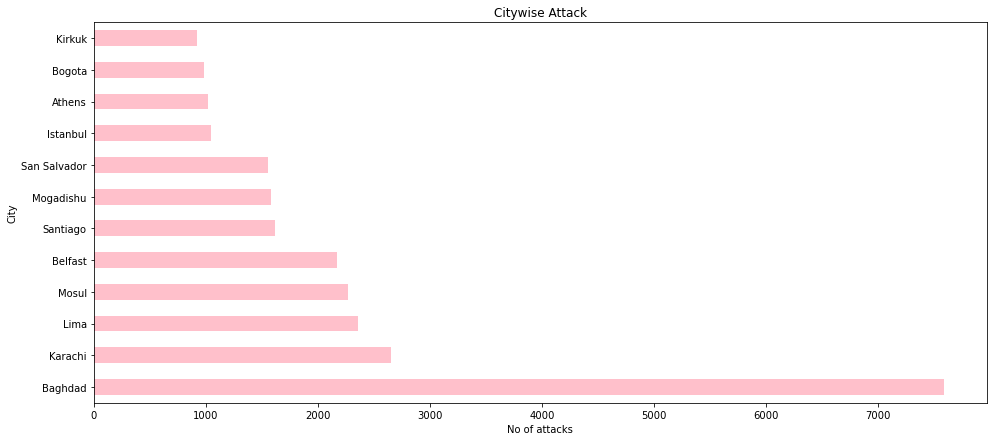

In [24]:
city.plot(kind="barh",figsize=(16,7),color="pink")
plt.title("Citywise Attack")
plt.xlabel("No of attacks")
plt.ylabel("City")

Top 5 AttackTypes

In [25]:
atype=df[["attacktype1_txt"]].rename(columns={"attacktype1_txt":"Attacktype"}).value_counts()[0:5]
atype

Attacktype                    
Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
dtype: int64

Text(0, 0.5, 'No of Attacks')

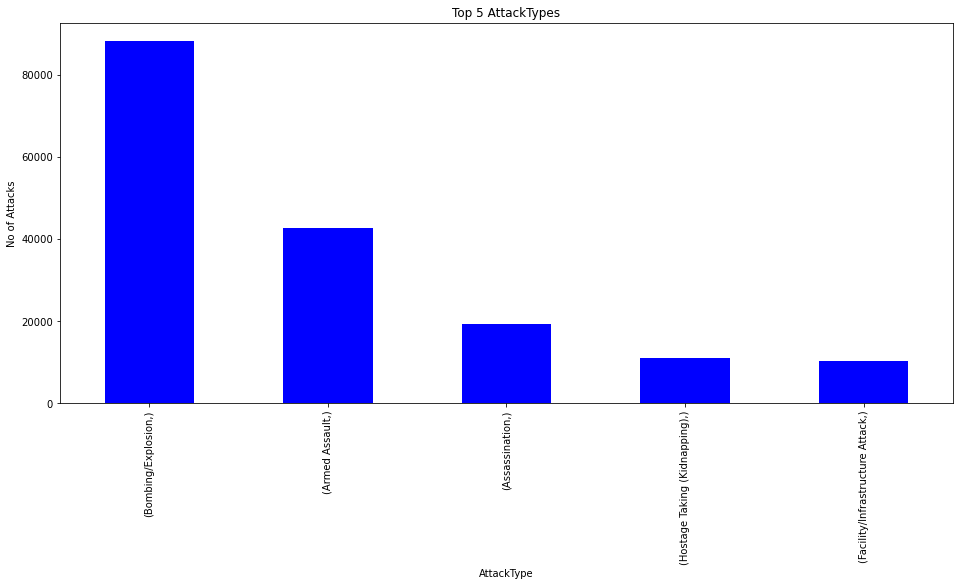

In [26]:
atype.plot(kind="bar",figsize=(16,7),color="blue")
plt.title("Top 5 AttackTypes")
plt.xlabel("AttackType")
plt.ylabel("No of Attacks")

Top 5 TargetTypes

In [27]:
ttype=df[["targtype1_txt"]].rename(columns={"targtype1_txt":"Targettype"}).value_counts()[0:5]
ttype

Targettype                 
Private Citizens & Property    43511
Military                       27984
Police                         24506
Government (General)           21283
Business                       20669
dtype: int64

Text(0, 0.5, 'No of Attacks')

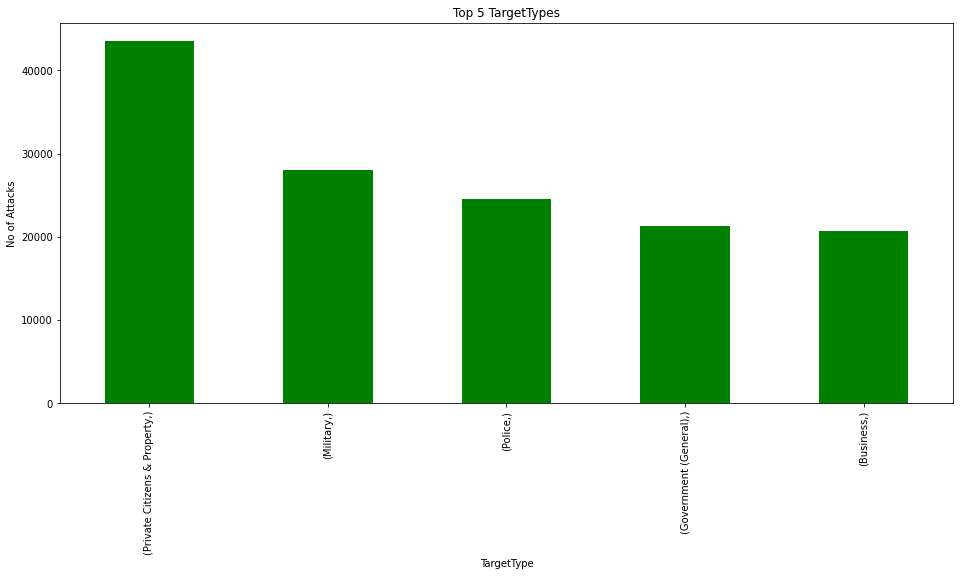

In [28]:
ttype.plot(kind="bar",figsize=(16,7),color="green")
plt.title("Top 5 TargetTypes")
plt.xlabel("TargetType")
plt.ylabel("No of Attacks")

### Conclusion:

1] No of Attacks were most in Year 2014 follwed by 2015 and 2016.

2] No of Casualties and No of Killed were also most in year 2014.

3] No of Wounded were most in 2015 follwed by 2014 and 2016.

4] Hence, In Span of 3 years from 2014-2016 there were more Terrorist Attacks.

5] No of Attacks in Iraq is most follwed by Pakistan, Afganisthan and India.

6] Baghdad City has most No of Attacks.

7] Bombing or Explosion, Armed Assaults and Assasination are Top 3 Attacktypes.

8] Private Citizens and property is top Targettype follwed by military and Police.